In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_absolute_error
import copy
# import pyplot
import matplotlib.pyplot as plt

In [22]:
#load concrete_data.xls
data = pd.read_excel('Concrete_Data.xls')
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [23]:
# Split the data into input features and target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
print(X)
print(y)

# Split the data into a training set (70%) and a testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#chnge y train to shape (721,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
print(y_train.shape)
print(y_test.shape)

[[ 540.     0.     0.  ... 1040.   676.    28. ]
 [ 540.     0.     0.  ... 1055.   676.    28. ]
 [ 332.5  142.5    0.  ...  932.   594.   270. ]
 ...
 [ 148.5  139.4  108.6 ...  892.4  780.    28. ]
 [ 159.1  186.7    0.  ...  989.6  788.9   28. ]
 [ 260.9  100.5   78.3 ...  864.5  761.5   28. ]]
[79.98611076 61.88736576 40.26953526 ... 23.69660064 32.76803638
 32.40123514]
(721, 1)
(309, 1)


In [24]:
# Standardize the input features for better training performance
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)

(721, 8)


In [25]:
scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

Epoch 100/1000, Mean Squared Error: 2.5684345100617594
Epoch 200/1000, Mean Squared Error: 1.1561532288089924
Epoch 300/1000, Mean Squared Error: 0.6072522222359524
Epoch 400/1000, Mean Squared Error: 0.369020333138193
Epoch 500/1000, Mean Squared Error: 0.2574502139876781
Epoch 600/1000, Mean Squared Error: 0.20144603255803678
Epoch 700/1000, Mean Squared Error: 0.17107731748531757
Epoch 800/1000, Mean Squared Error: 0.15308123390771927
Epoch 900/1000, Mean Squared Error: 0.14135843518899519
Epoch 1000/1000, Mean Squared Error: 0.13300638032341314


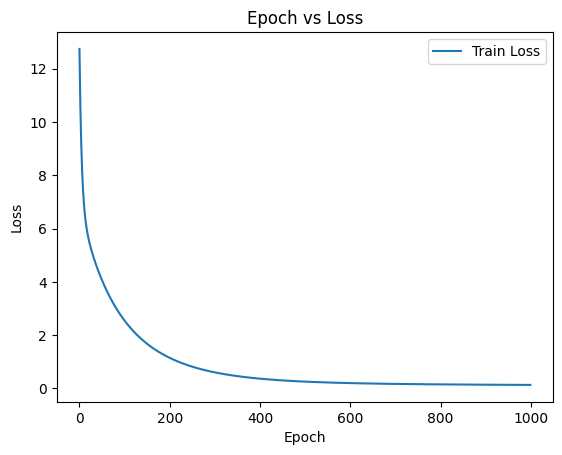

Mean Absolute Error on Test Data: 0.2815923440218478


In [99]:
# Define the architecture of the neural network
input_size = X_train.shape[1]
hidden_size = 25  # Number of hidden units
output_size = 1  # One output for regression
learning_rate = 0.001
epochs = 1000

# Initialize weights and biases
np.random.seed(42)
weights_input_hidden = np.random.randn(input_size, hidden_size)
biases_hidden = np.zeros(hidden_size)
weights_hidden_output = np.random.randn(hidden_size, output_size)
bias_output = np.zeros(output_size)

# print(np.dot(grad_output, weights_hidden_output.T).shape)
# Training loop
loss=[]
for epoch in range(epochs):
    # Forward pass
    hidden_input = np.dot(X_train, weights_input_hidden) + biases_hidden
    hidden_output = np.tanh(hidden_input)
    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    y_pred = final_input

    # Calculate Mean Squared Error (MSE)
    mse = np.mean((y_pred - y_train) ** 2)
    loss.append(mse)
    # Backpropagation
    grad_output = 2 * (y_pred - y_train) / len(y_train)
    # print(y_train.shape)
    grad_hidden = (1 - np.tanh(hidden_input) ** 2) * np.dot(grad_output, weights_hidden_output.T)

    # Update weights and biases using gradient descent
    weights_hidden_output -= learning_rate * np.dot(hidden_output.T, grad_output)
    bias_output -= learning_rate * np.sum(grad_output, axis=0)
    weights_input_hidden -= learning_rate * np.dot(X_train.T, grad_hidden)
    biases_hidden -= learning_rate * np.sum(grad_hidden, axis=0)

    # Print the MSE at each epoch (optional)
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Mean Squared Error: {mse}")
plt.plot(range(epochs), loss, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()
plt.show()
# Make predictions on the testing data
hidden_input_test = np.dot(X_test, weights_input_hidden) + biases_hidden
hidden_output_test = np.tanh(hidden_input_test)
final_input_test = np.dot(hidden_output_test, weights_hidden_output) + bias_output
y_pred_test = final_input_test

# Calculate Mean Absolute Error (MAE) on the testing data
mae = mean_absolute_error(y_test, y_pred_test)
print(f"Mean Absolute Error on Test Data: {mae}")

Epoch 100/1000, Mean Squared Error: 2.281885256592477
Epoch 200/1000, Mean Squared Error: 1.5564131109301282
Epoch 300/1000, Mean Squared Error: 1.2677002461510596
Epoch 400/1000, Mean Squared Error: 1.0963984825695259
Epoch 500/1000, Mean Squared Error: 0.9751924732916276
Epoch 600/1000, Mean Squared Error: 0.8814241468733004
Epoch 700/1000, Mean Squared Error: 0.8050418290039243
Epoch 800/1000, Mean Squared Error: 0.7407288905068512
Epoch 900/1000, Mean Squared Error: 0.6853351983946888
Epoch 1000/1000, Mean Squared Error: 0.6368451048926401


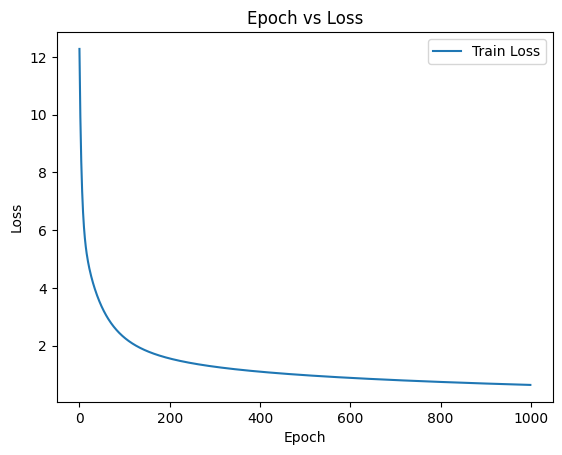

Mean Absolute Error on Test Data: 0.6092007293370174


In [97]:
# Define the architecture of the neural network
input_size = X_train.shape[1]
hidden_size = 50  # Number of hidden units
output_size = 1  # One output for regression
learning_rate = 0.001
epochs = 1000

# Initialize weights and biases
np.random.seed(42)
weights_input_hidden = np.random.randn(input_size, hidden_size)
biases_hidden = np.zeros(hidden_size)
weights_hidden_output = np.random.randn(hidden_size, output_size)
bias_output = np.zeros(output_size)

# print(np.dot(grad_output, weights_hidden_output.T).shape)
# Training loop
loss=[]
for epoch in range(epochs):
    # Forward pass
    hidden_input = np.dot(X_train, weights_input_hidden) + biases_hidden
    hidden_output = np.tanh(hidden_input)
    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    y_pred = final_input

    # Calculate Mean Squared Error (MSE)
    mse = np.mean((y_pred - y_train) ** 2)
    loss.append(mse)
    # Backpropagation
    grad_output = 2 * (y_pred - y_train) / len(y_train)
    # print(y_train.shape)
    grad_hidden = (1 - np.tanh(hidden_input) ** 2) * np.dot(grad_output, weights_hidden_output.T)

    # Update weights and biases using gradient descent
    weights_hidden_output -= learning_rate * np.dot(hidden_output.T, grad_output)
    bias_output -= learning_rate * np.sum(grad_output, axis=0)
    weights_input_hidden -= learning_rate * np.dot(X_train.T, grad_hidden)
    biases_hidden -= learning_rate * np.sum(grad_hidden, axis=0)

    # Print the MSE at each epoch (optional)
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Mean Squared Error: {mse}")
plt.plot(range(epochs), loss, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()
plt.show()
# Make predictions on the testing data
hidden_input_test = np.dot(X_test, weights_input_hidden) + biases_hidden
hidden_output_test = np.tanh(hidden_input_test)
final_input_test = np.dot(hidden_output_test, weights_hidden_output) + bias_output
y_pred_test = final_input_test

# Calculate Mean Absolute Error (MAE) on the testing data
mae = mean_absolute_error(y_test, y_pred_test)
print(f"Mean Absolute Error on Test Data: {mae}")

In [ ]:
# # Split the data into a training set (70%) and a testing set (30%)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# y_train=y_train.reshape(-1,1)

# # Standardize the input features for better training performance
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

Epoch 100/1000, Mean Squared Error: 1.495758930194775
Epoch 200/1000, Mean Squared Error: 0.8008012734176929
Epoch 300/1000, Mean Squared Error: 0.5132254689401794
Epoch 400/1000, Mean Squared Error: 0.3765150528272449
Epoch 500/1000, Mean Squared Error: 0.30271130082072933
Epoch 600/1000, Mean Squared Error: 0.25841839627518587
Epoch 700/1000, Mean Squared Error: 0.23055076564037544
Epoch 800/1000, Mean Squared Error: 0.211128424657064
Epoch 900/1000, Mean Squared Error: 0.19680564093047165
Epoch 1000/1000, Mean Squared Error: 0.18590580193758627


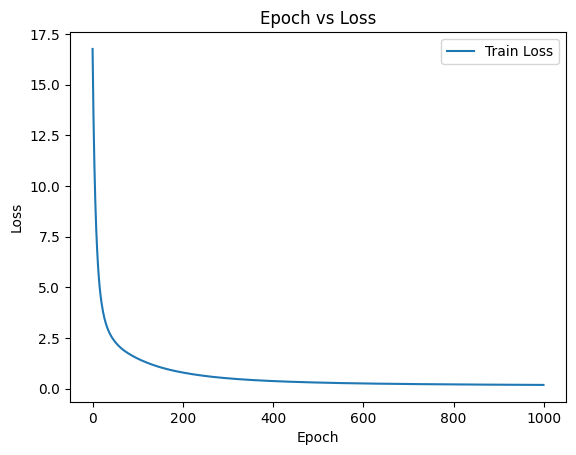

Mean Absolute Error on Test Data: 0.3522729869053831


In [98]:
# Leaky ReLU activation function
def leaky_relu(x):
    return np.where(x >= 0, x, 0.01 * x)

# Define the architecture of the neural network
input_size = X_train.shape[1]
hidden_size = 25  # Number of hidden units
output_size = 1  # One output for regression
learning_rate = 0.001
epochs = 1000

# Initialize weights and biases
np.random.seed(42)
weights_input_hidden = np.random.randn(input_size, hidden_size)
biases_hidden = np.zeros(hidden_size)
weights_hidden_output = np.random.randn(hidden_size, output_size)
bias_output = np.zeros(output_size)
loss=[]
# Training loop
for epoch in range(epochs):
    # Forward pass with Leaky ReLU activation
    hidden_input = np.dot(X_train, weights_input_hidden) + biases_hidden
    hidden_output = leaky_relu(hidden_input)
    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    y_pred = final_input
    # print(y_pred)

    # Calculate Mean Squared Error (MSE)
    mse = np.mean((y_pred - y_train) ** 2)
    loss.append(mse)
    # Backpropagation
    grad_output = 2 * (y_pred - y_train) / len(y_train)
    grad_hidden = np.where(hidden_input >= 0, grad_output.dot(weights_hidden_output.T), 0.01 * grad_output.dot(weights_hidden_output.T))

    # Update weights and biases using gradient descent
    weights_hidden_output -= learning_rate * hidden_output.T.dot(grad_output)
    bias_output -= learning_rate * np.sum(grad_output, axis=0)
    weights_input_hidden -= learning_rate * X_train.T.dot(grad_hidden)
    biases_hidden -= learning_rate * np.sum(grad_hidden, axis=0)

    # Print the MSE at each epoch (optional)
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Mean Squared Error: {mse}")
plt.plot(range(epochs), loss, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()
plt.show()

# Make predictions on the testing data
hidden_input_test = np.dot(X_test, weights_input_hidden) + biases_hidden
hidden_output_test = leaky_relu(hidden_input_test)
final_input_test = np.dot(hidden_output_test, weights_hidden_output) + bias_output
y_pred_test = final_input_test

# Calculate Mean Absolute Error (MAE) on the testing data
mae = mean_absolute_error(y_test, y_pred_test)
print(f"Mean Absolute Error on Test Data: {mae}")

Epoch 100/1000, Mean Squared Error: 2.5014807748102066
Epoch 200/1000, Mean Squared Error: 1.2173148447326463
Epoch 300/1000, Mean Squared Error: 0.7118785891563465
Epoch 400/1000, Mean Squared Error: 0.49523994519424586
Epoch 500/1000, Mean Squared Error: 0.3945783970967775
Epoch 600/1000, Mean Squared Error: 0.3431697474716543
Epoch 700/1000, Mean Squared Error: 0.3131453815128638
Epoch 800/1000, Mean Squared Error: 0.2933121664643976
Epoch 900/1000, Mean Squared Error: 0.27841786080780184
Epoch 1000/1000, Mean Squared Error: 0.2655660188559592


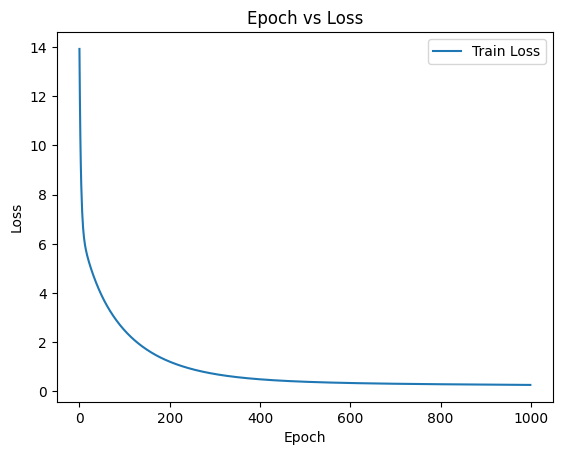

Mean Absolute Error on Test Data: 0.39254218226942234


In [96]:
# Define the architecture of the neural network
input_size = X_train.shape[1]
hidden_size = 50  # Number of hidden units
output_size = 1  # One output for regression
learning_rate = 0.001
epochs = 1000

# Initialize weights and biases
np.random.seed(42)
weights_input_hidden = np.random.randn(input_size, hidden_size)
biases_hidden = np.zeros(hidden_size)
weights_hidden_output = np.random.randn(hidden_size, output_size)
bias_output = np.zeros(output_size)

# Training loop
loss=[]
for epoch in range(epochs):
    
    # Forward pass with Leaky ReLU activation
    hidden_input = np.dot(X_train, weights_input_hidden) + biases_hidden
    hidden_output = leaky_relu(hidden_input)
    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    y_pred = final_input
    # print(y_pred)

    # Calculate Mean Squared Error (MSE)
    mse = (np.mean((y_pred - y_train) ** 2))
    loss.append(mse)

    # Backpropagation
    grad_output = 2 * (y_pred - y_train) / len(y_train)
    grad_hidden = np.where(hidden_input >= 0, grad_output.dot(weights_hidden_output.T), 0.01 * grad_output.dot(weights_hidden_output.T))

    # Update weights and biases using gradient descent
    weights_hidden_output -= learning_rate * hidden_output.T.dot(grad_output)
    bias_output -= learning_rate * np.sum(grad_output, axis=0)
    weights_input_hidden -= learning_rate * X_train.T.dot(grad_hidden)
    biases_hidden -= learning_rate * np.sum(grad_hidden, axis=0)

    # Print the MSE at each epoch (optional)
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Mean Squared Error: {mse}")
        # print(y_pred)
# plt.plot(range(epochs), loss_history, label='Train Loss')
plt.plot(range(epochs), loss, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()
plt.show()

# Make predictions on the testing data
hidden_input_test = np.dot(X_test, weights_input_hidden) + biases_hidden
hidden_output_test = leaky_relu(hidden_input_test)
final_input_test = np.dot(hidden_output_test, weights_hidden_output) + bias_output
y_pred_test = final_input_test
# print(y_pred_test)

# Calculate Mean Absolute Error (MAE) on the testing data
mae = mean_absolute_error(y_test, y_pred_test)
print(f"Mean Absolute Error on Test Data: {mae}")

Backprop is the fastest of the three


In [101]:
# Define the Rprop class
class Rprop:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize network architecture
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize network weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))
        
        # Initialize Rprop parameters
        self.delta_w_input_hidden = np.zeros((input_size, hidden_size))
        self.delta_w_hidden_output = np.zeros((hidden_size, output_size))
        self.delta_b_hidden = np.zeros((1, hidden_size))
        self.delta_b_output = np.zeros((1, output_size))
        
        self.prev_gradient_w_input_hidden = np.ones((input_size, hidden_size))
        self.prev_gradient_w_hidden_output = np.ones((hidden_size, output_size))
        self.prev_gradient_b_hidden = np.ones((1, hidden_size))
        self.prev_gradient_b_output = np.ones((1, output_size))
        
        self.delta_max = 1.2  # Maximum weight update factor
        self.delta_min = 1e-6  # Minimum weight update factor
        self.eta_plus = 1.2  # Increase factor
        self.eta_minus = 0.5  # Decrease factor

    def tanh(self, x):
        return np.tanh(x)

    def tanh_derivative(self, x):
        return 1 - np.tanh(x)**2
    
    def leaky_relu(self, x):
        return np.maximum(0.01*x, x)

    def leaky_relu_derivative(self, x):
        dx = np.ones_like(x)
        dx[x < 0] = 0.01
        return dx 
    
    def forward2(self, x):
        # Forward pass
        self.input_layer = x
        self.hidden_layer_input = np.dot(self.input_layer, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = self.leaky_relu(self.hidden_layer_input)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.output_layer_output = self.leaky_relu(self.output_layer_input)
        return self.output_layer_output
    
    def backward2(self, x, y, learning_rate):
        # Backpropagation
        output_error = y - self.output_layer_output
        delta_output = output_error * self.leaky_relu_derivative(self.output_layer_input)
        
        hidden_error = delta_output.dot(self.weights_hidden_output.T)
        delta_hidden = hidden_error * self.leaky_relu_derivative(self.hidden_layer_input)
        
        # Update Rprop parameters
        x=x.reshape(1,-1)
        gradient_w_input_hidden = x.T.dot(delta_hidden)
        gradient_w_hidden_output = self.hidden_layer_output.T.dot(delta_output)
        gradient_b_hidden = np.sum(delta_hidden, axis=0, keepdims=True)
        gradient_b_output = np.sum(delta_output, axis=0, keepdims=True)
        
        sign_w_input_hidden = np.sign(gradient_w_input_hidden * self.prev_gradient_w_input_hidden)
        sign_w_hidden_output = np.sign(gradient_w_hidden_output * self.prev_gradient_w_hidden_output)
        sign_b_hidden = np.sign(gradient_b_hidden * self.prev_gradient_b_hidden)
        sign_b_output = np.sign(gradient_b_output * self.prev_gradient_b_output)
        
        self.delta_w_input_hidden = np.where(sign_w_input_hidden > 0, 
                                              np.minimum(self.delta_w_input_hidden * self.eta_plus, self.delta_max), 
                                              np.maximum(self.delta_w_input_hidden * self.eta_minus, self.delta_min))
        # print(self.delta_w_input_hidden)
        self.delta_w_hidden_output = np.where(sign_w_hidden_output > 0, 
                                               np.minimum(self.delta_w_hidden_output * self.eta_plus, self.delta_max), 
                                               np.maximum(self.delta_w_hidden_output * self.eta_minus, self.delta_min))
        
        self.delta_b_hidden = np.where(sign_b_hidden > 0, 
                                        np.minimum(self.delta_b_hidden * self.eta_plus, self.delta_max), 
                                        np.maximum(self.delta_b_hidden * self.eta_minus, self.delta_min))
        
        self.delta_b_output = np.where(sign_b_output > 0, 
                                        np.minimum(self.delta_b_output * self.eta_plus, self.delta_max), 
                                        np.maximum(self.delta_b_output * self.eta_minus, self.delta_min))
        
        # Update weights and biases
        self.weights_input_hidden += self.delta_w_input_hidden * np.sign(gradient_w_input_hidden)
        self.weights_hidden_output += self.delta_w_hidden_output * np.sign(gradient_w_hidden_output)
        self.bias_hidden += self.delta_b_hidden * np.sign(gradient_b_hidden)
        self.bias_output += self.delta_b_output * np.sign(gradient_b_output)
        
        # Store previous gradients for the next iteration
        self.prev_gradient_w_input_hidden = gradient_w_input_hidden
        self.prev_gradient_w_hidden_output = gradient_w_hidden_output
        self.prev_gradient_b_hidden = gradient_b_hidden
        self.prev_gradient_b_output = gradient_b_output


    def forward(self, x):
        # Forward pass
        self.input_layer = x
        self.hidden_layer_input = np.dot(self.input_layer, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = self.tanh(self.hidden_layer_input)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.output_layer_output = self.tanh(self.output_layer_input)
        return self.output_layer_output

    def backward(self, x, y, learning_rate):
        # Backpropagation
        output_error = y - self.output_layer_output
        delta_output = output_error * self.tanh_derivative(self.output_layer_input)
        
        hidden_error = delta_output.dot(self.weights_hidden_output.T)
        delta_hidden = hidden_error * self.tanh_derivative(self.hidden_layer_input)
        
        # Update Rprop parameters
        x=x.reshape(1,-1)
        gradient_w_input_hidden = x.T.dot(delta_hidden)
        gradient_w_hidden_output = self.hidden_layer_output.T.dot(delta_output)
        gradient_b_hidden = np.sum(delta_hidden, axis=0, keepdims=True)
        gradient_b_output = np.sum(delta_output, axis=0, keepdims=True)
        
        sign_w_input_hidden = np.sign(gradient_w_input_hidden * self.prev_gradient_w_input_hidden)
        sign_w_hidden_output = np.sign(gradient_w_hidden_output * self.prev_gradient_w_hidden_output)
        sign_b_hidden = np.sign(gradient_b_hidden * self.prev_gradient_b_hidden)
        sign_b_output = np.sign(gradient_b_output * self.prev_gradient_b_output)
        
        self.delta_w_input_hidden = np.where(sign_w_input_hidden > 0, 
                                              np.minimum(self.delta_w_input_hidden * self.eta_plus, self.delta_max), 
                                              np.maximum(self.delta_w_input_hidden * self.eta_minus, self.delta_min))
        # print(self.delta_w_input_hidden)
        self.delta_w_hidden_output = np.where(sign_w_hidden_output > 0, 
                                               np.minimum(self.delta_w_hidden_output * self.eta_plus, self.delta_max), 
                                               np.maximum(self.delta_w_hidden_output * self.eta_minus, self.delta_min))
        
        self.delta_b_hidden = np.where(sign_b_hidden > 0, 
                                        np.minimum(self.delta_b_hidden * self.eta_plus, self.delta_max), 
                                        np.maximum(self.delta_b_hidden * self.eta_minus, self.delta_min))
        
        self.delta_b_output = np.where(sign_b_output > 0, 
                                        np.minimum(self.delta_b_output * self.eta_plus, self.delta_max), 
                                        np.maximum(self.delta_b_output * self.eta_minus, self.delta_min))
        
        # Update weights and biases
        self.weights_input_hidden += self.delta_w_input_hidden * np.sign(gradient_w_input_hidden)
        self.weights_hidden_output += self.delta_w_hidden_output * np.sign(gradient_w_hidden_output)
        self.bias_hidden += self.delta_b_hidden * np.sign(gradient_b_hidden)
        self.bias_output += self.delta_b_output * np.sign(gradient_b_output)
        
        # Store previous gradients for the next iteration
        self.prev_gradient_w_input_hidden = gradient_w_input_hidden
        self.prev_gradient_w_hidden_output = gradient_w_hidden_output
        self.prev_gradient_b_hidden = gradient_b_hidden
        self.prev_gradient_b_output = gradient_b_output

    def train(self, x_train, y_train, epochs ,learning_rate):
        loss_history = []  # List to store loss values
        # test_loss_history = []
        for epoch in range(epochs):
            for i in range(len(x_train)):
                x = x_train[i]
                y = y_train[i]
                output = self.forward(x)
                self.backward(x, y, learning_rate)
            loss = np.mean(np.square(y_train - self.forward(x_train)))
            loss2=np.mean(np.square(y_test - self.forward(x_test)))
            loss_history.append(loss)  # Append the loss to the history
            test_loss_history.append(loss2)
            if (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch + 1}/{epochs}, Loss: {np.mean(np.square(y_train - self.forward(x_train)))}")
         # Plot the loss history
        plt.plot(range(epochs), loss_history, label='Train Loss')
        # plt.plot(range(epochs), test_loss_history, label='Test Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Epoch vs Loss')
        plt.legend()
        plt.show()

    def train2(self, x_train, y_train,x_test,y_test ,epochs, learning_rate):
        loss_history = []  # List to store loss values
        test_loss_history = []
        for epoch in range(epochs):
            for i in range(len(x_train)):
                x = x_train[i]
                y = y_train[i]
                output = self.forward2(x)
                self.backward2(x, y, learning_rate)
            loss = np.mean(np.square(y_train - self.forward2(x_train)))
            loss2 = np.mean(np.square(y_test - self.forward2(x_test)))
            loss_history.append(loss)  # Append the loss to the history
            test_loss_history.append(loss2)
            if (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch + 1}/{epochs}, Loss: {np.mean(np.square(y_train - self.forward2(x_train)))}")
         # Plot the loss history
        plt.plot(range(epochs), loss_history, label='Train Loss')
        plt.plot(range(epochs), test_loss_history, label='Test Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Epoch vs Loss')
        plt.legend()
        plt.show()
# Example usage

# Generate random data for demonstration
np.random.seed(0)

# Create and train the neural network
input_size = 8  # Updated input size
hidden_size = 25
output_size = 1    

Epoch 100/1000, Loss: 0.5405717123629817
Epoch 200/1000, Loss: 0.4979842995784299
Epoch 300/1000, Loss: 0.46087598502245813
Epoch 400/1000, Loss: 0.4284459025349248
Epoch 500/1000, Loss: 0.3998522999888658
Epoch 600/1000, Loss: 0.3771731618945058
Epoch 700/1000, Loss: 0.35611015915462546
Epoch 800/1000, Loss: 0.3375961147318247
Epoch 900/1000, Loss: 0.31944261790624473
Epoch 1000/1000, Loss: 0.30521464391974085


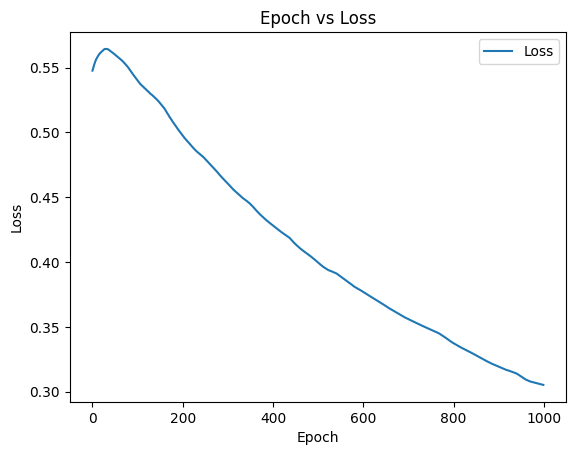

In [44]:

rprop_net = Rprop(input_size, hidden_size, output_size)
rprop_net.train(X_train, y_train, epochs=1000, learning_rate=0.001)

Epoch 100/1000, Loss: 0.681553165057133
Epoch 200/1000, Loss: 0.5884517902454175
Epoch 300/1000, Loss: 0.5156195565888264
Epoch 400/1000, Loss: 0.47186116308976284
Epoch 500/1000, Loss: 0.4143099274853136
Epoch 600/1000, Loss: 0.36386283260286945
Epoch 700/1000, Loss: 0.3361782546527725
Epoch 800/1000, Loss: 0.312425643588799
Epoch 900/1000, Loss: 0.29057761604590304
Epoch 1000/1000, Loss: 0.2750922818024318


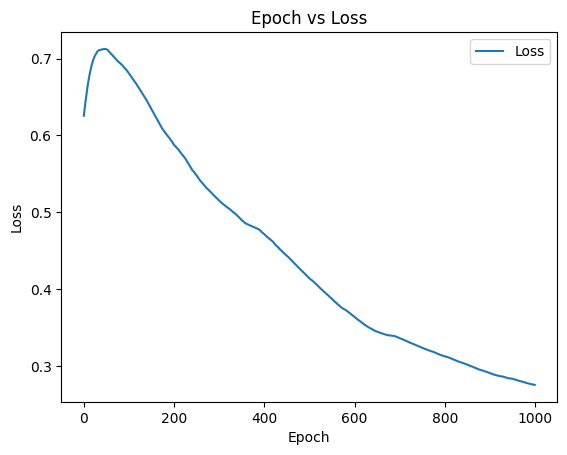

In [36]:
rprop_net2 = Rprop(input_size, 50, output_size)
rprop_net2.train(X_train, y_train,epochs=1000, learning_rate=0.001)

Epoch 100/1000, Loss: 3.749646963617282
Epoch 200/1000, Loss: 2.9485136171839454
Epoch 300/1000, Loss: 2.447090650376759
Epoch 400/1000, Loss: 2.0633043689871164
Epoch 500/1000, Loss: 1.7475851965052323
Epoch 600/1000, Loss: 1.5531583168208076
Epoch 700/1000, Loss: 1.4091583083784776
Epoch 800/1000, Loss: 1.233967284687651
Epoch 900/1000, Loss: 1.062247881442859
Epoch 1000/1000, Loss: 0.9497344513396124


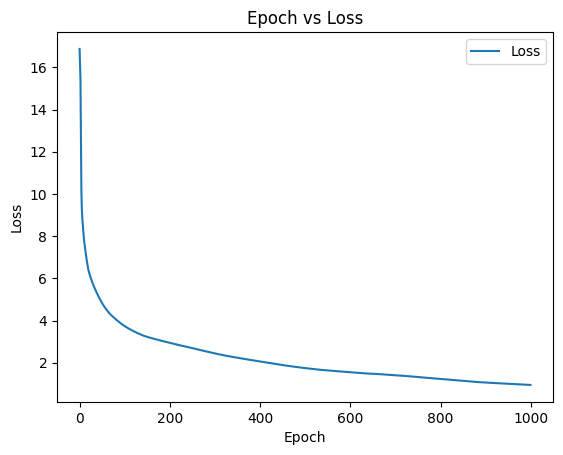

In [41]:
rprop_net3 = Rprop(input_size, 25, output_size)
rprop_net3.train2(X_train, y_train, epochs=1000, learning_rate=0.001)

Epoch 100/1000, Loss: 1.9962081320494407
Epoch 200/1000, Loss: 1.6730425593433353
Epoch 300/1000, Loss: 1.4552018434782246
Epoch 400/1000, Loss: 1.230560961147961
Epoch 500/1000, Loss: 1.0705874287129107
Epoch 600/1000, Loss: 0.9338427646835561
Epoch 700/1000, Loss: 0.8134705553312067
Epoch 800/1000, Loss: 0.7209994021010016
Epoch 900/1000, Loss: 0.6399198586849596
Epoch 1000/1000, Loss: 0.5690138381125698


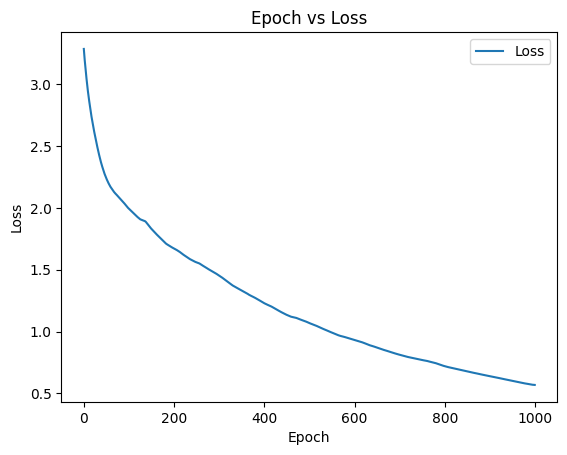

In [43]:
rprop_net4 = Rprop(input_size, 50, output_size)
rprop_net4.train2(X_train, y_train, epochs=1000, learning_rate=0.001)

for r prop:
50 layer has lower loss than 25 layer for leaky relu
50 layer is similar to 25 layer for tanh, 50 layer is slightly better

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
scaler_y=MinMaxScaler()
y_train=scaler_y.fit_transform(y_train.reshape(-1,1))
y_test=scaler_y.transform(y_test.reshape(-1,1))

Epoch 100/200, Loss: 1.4188412327757898
Epoch 200/200, Loss: 0.38212062237686695


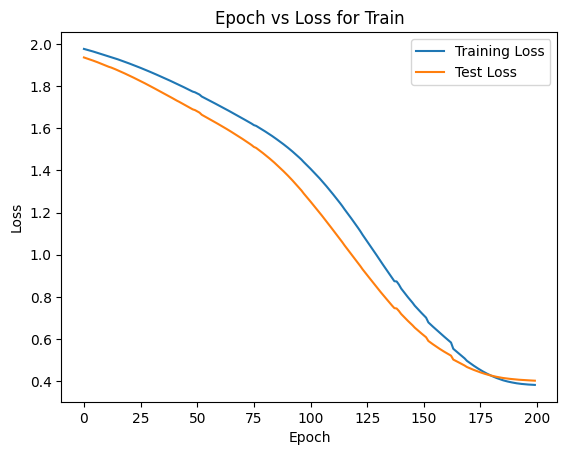

[1.9768377064707332, 1.9738927836824067, 1.9709018328149617, 1.9678501563869775, 1.9647407727861177, 1.9615222927597018, 1.9582720935051912, 1.9545634390266453, 1.9512027185707488, 1.9476786011500367, 1.9442654359989193, 1.9407286349754507, 1.9380879059245917, 1.9347380134421448, 1.931031921750508, 1.9272741140880898, 1.923462978913448, 1.9196588825881764, 1.9157222217444732, 1.9117484265967541, 1.9077194105061013, 1.903628947012666, 1.8994886883437425, 1.8952961954509804, 1.8910311467883005, 1.8867668744436692, 1.8824222168281874, 1.8779944786689322, 1.8735211776899139, 1.8689422571778815, 1.8644420731430127, 1.8597092228865242, 1.8550169165718224, 1.8502625614182426, 1.8454779728432762, 1.8407051151526113, 1.8358239677922548, 1.831110864341847, 1.826127309128565, 1.8211088506344357, 1.8157984398449463, 1.810725454845559, 1.8059556421359788, 1.8007405194858805, 1.7955892815872045, 1.7903838402254193, 1.7850972267125376, 1.7797571695602608, 1.7742442217125411, 1.7709942241388783, 1.765

In [83]:
# Define the QuickProp class
class QuickProp:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize network architecture
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize network weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.delta_input_hidden = np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.delta_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))
        
        # Initialize QuickProp parameters
        self.prev_gradient_w_input_hidden = np.zeros((input_size, hidden_size))
        self.prev_gradient_w_hidden_output = np.zeros((hidden_size, output_size))
        self.prev_gradient_b_hidden = np.zeros((1, hidden_size))
        self.prev_gradient_b_output = np.zeros((1, output_size))
        
        # self.theta_w_input_hidden = np.ones((input_size, hidden_size))
        # self.theta_w_hidden_output = np.ones((hidden_size, output_size))
        self.delta_input_hidden = np.ones((input_size, hidden_size))
        self.delta_hidden_output = np.ones((hidden_size, output_size))
        # self.theta_b_hidden = np.ones((1, hidden_size))
        # self.theta_b_output = np.ones((1, output_size))
        self.delta_b_hidden = np.ones((1, hidden_size))
        self.delta_b_hidden.fill(0.001)
        self.delta_b_output = np.ones((1, output_size))
        self.delta_b_output.fill(0.001)

        
        # self.mu = 1.75  # Increase factor
        # self.alpha = 0.0001  # Decrease factor

    def tanh(self, x):
        return np.tanh(x)

    def tanh_derivative(self, x):
        return 1 - np.tanh(x)**2

    def forward(self, x):
        # Forward pass
        self.input_layer = x
        self.hidden_layer_input = np.dot(self.input_layer, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = self.tanh(self.hidden_layer_input)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.output_layer_output = self.tanh(self.output_layer_input)
        return self.output_layer_output

    def backward(self, x, y):
        min_val=1e-6
        max_val=50
        # Backpropagation
        output_error = y - self.output_layer_output
        delta_output = output_error * self.tanh_derivative(self.output_layer_input)
        
        hidden_error = delta_output.dot(self.weights_hidden_output.T)
        delta_hidden = hidden_error * self.tanh_derivative(self.hidden_layer_input)
        
        # Update QuickProp parameters
        x=x.reshape(1,-1)
        gradient_w_input_hidden = x.T.dot(delta_hidden)
        # print(gradient_w_input_hidden.shape)
        gradient_w_hidden_output = self.hidden_layer_output.T.dot(delta_output)
        # print(gradient_w_hidden_output.shape)
        gradient_b_hidden = np.sum(delta_hidden, axis=0, keepdims=True)
        gradient_b_output = np.sum(delta_output, axis=0, keepdims=True)
        #iterate over each element of the matrix gradient_w_input_hidden
        delta_input_hidden_dc=copy.deepcopy(self.delta_input_hidden)
        for i in range(gradient_w_input_hidden.shape[0]):
            for j in range(gradient_w_input_hidden.shape[1]):
                delta=1
                if(gradient_w_input_hidden[i][j]-self.prev_gradient_w_input_hidden[i][j]!=0):
                    delta=self.delta_input_hidden[i][j]/(gradient_w_input_hidden[i][j]-self.prev_gradient_w_input_hidden[i][j])
                delta*=gradient_w_input_hidden[i][j]
                delta=max(min_val,delta)
                delta=min(max_val,delta)
                delta_input_hidden_dc[i][j]=delta
                # print(delta)
        # print(np.array_equal(delta_input_hidden_dc,self.delta_input_hidden))
        self.delta_input_hidden=delta_input_hidden_dc

        delta_hidden_output_dc=copy.deepcopy(self.delta_hidden_output)
        for i in range(gradient_w_hidden_output.shape[0]):
            for j in range(gradient_w_hidden_output.shape[1]):
                delta=1
                if(gradient_w_hidden_output[i][j]-self.prev_gradient_w_hidden_output[i][j]!=0):
                    delta=self.delta_hidden_output[i][j]/(gradient_w_hidden_output[i][j]-self.prev_gradient_w_hidden_output[i][j])
                delta*=gradient_w_hidden_output[i][j]
                delta=max(min_val,delta)
                delta=min(max_val,delta)
                delta_hidden_output_dc[i][j]=delta
        
        self.delta_hidden_output=delta_hidden_output_dc
        
    
        delta_b_hidden_dc=copy.deepcopy(self.delta_b_hidden)
        for i in range(gradient_b_hidden.shape[0]):
            for j in range(gradient_b_hidden.shape[1]):
                delta=1
                if(gradient_b_hidden[i][j]-self.prev_gradient_b_hidden[i][j]!=0):
                    delta=self.delta_b_hidden[i][j]/(gradient_b_hidden[i][j]-self.prev_gradient_b_hidden[i][j])
                delta*=gradient_b_hidden[i][j]
                delta=max(min_val,delta)
                delta=min(max_val,delta)
                self.delta_b_hidden[i][j]=delta
        self.delta_b_hidden=delta_b_hidden_dc

        delta_b_output_dc=copy.deepcopy(self.delta_b_output)
        for i in range(gradient_b_output.shape[0]):
            for j in range(gradient_b_output.shape[1]):
                delta=1
                if(gradient_b_output[i][j]-self.prev_gradient_b_output[i][j]!=0):
                    delta=self.delta_b_output[i][j]/(gradient_b_output[i][j]-self.prev_gradient_b_output[i][j])
                delta*=gradient_b_output[i][j]
                delta=max(min_val,delta)
                delta=min(max_val,delta)
                self.delta_b_output[i][j]=delta
        self.delta_b_output=delta_b_output_dc

        # Update weights and biases       
        self.weights_input_hidden += 0.01*self.delta_input_hidden
        self.weights_hidden_output += 0.01*self.delta_hidden_output
        self.bias_hidden += 0.01*self.delta_b_hidden
        self.bias_output += 0.01*self.delta_b_output
        
        self.prev_gradient_w_input_hidden = gradient_w_input_hidden
        self.prev_gradient_w_hidden_output = gradient_w_hidden_output
        self.prev_gradient_b_hidden = gradient_b_hidden
        self.prev_gradient_b_output = gradient_b_output

    def train(self, x_train, y_train, x_test,y_test,epochs):
        loss_history = []  # List to store loss values
        test_loss_history=[]

        for epoch in range(epochs):
            for i in range(len(x_train)):
                x = x_train[i]
                y = y_train[i]
                self.forward(x)
                self.backward(x, y)

            loss = np.mean(np.square(y_train - self.forward(x_train)))
            loss2=np.mean(np.square(y_test-self.forward(x_test)))
            loss_history.append(loss)  # Append the loss to the history
            test_loss_history.append(loss2)

            if (epoch + 1) % 100 == 0:
                loss = np.mean(np.square(y_train - self.forward(x_train)))
                print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss}")

        plt.plot(range(epochs), loss_history, label='Training Loss')
        plt.plot(range(epochs), test_loss_history, label='Test Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Epoch vs Loss for Train')
        plt.legend()
        plt.show()
        print(loss_history)

# Example usage
if __name__ == "__main__":
    # Generate random data for demonstration
    np.random.seed(42)
    # x_train = np.random.rand(100, 8)
    # y_train = np.sin(2 * np.pi * x_train[:, 0:1]) + 0.1 * np.random.randn(100, 1)
    
    # Create and train the neural network
    input_size = 8
    hidden_size = 25
    output_size = 1
    quickprop_net = QuickProp(input_size, hidden_size, output_size)
    quickprop_net.train(X_train, y_train, X_test,y_test,epochs=200)


it converges after 200 iterations 
the test mse and train mse are similar as seen in the graph
the convergence mse is 0.382    

Epoch 100/200, Loss: 0.8220977827590981
Epoch 200/200, Loss: 0.4067680412328256


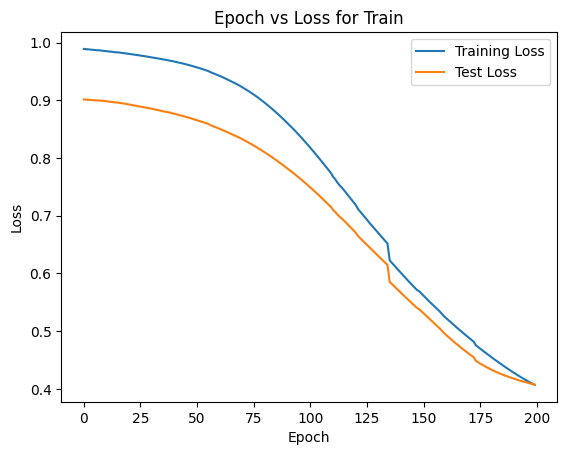

[0.9890017747132017, 0.9885924061722973, 0.9882521187140255, 0.9878819235912398, 0.987459090589993, 0.9870904098358675, 0.986650400955335, 0.9864981690672661, 0.9860658859272203, 0.9856413928202402, 0.9851800159897244, 0.9847028065014524, 0.9842183282210486, 0.9837354220964274, 0.9832645481176172, 0.9831020867438051, 0.98259769671639, 0.9820961617762788, 0.9815298900648253, 0.9809547107291298, 0.9804105863350144, 0.9798524959622364, 0.9792884210431329, 0.9787109815919316, 0.9781319173041835, 0.9775427156114443, 0.9769365247982981, 0.9763057293061602, 0.9756816720388181, 0.9750934634559618, 0.974476838921669, 0.9737449464250326, 0.9730250550158859, 0.9723270653894225, 0.9716091768161236, 0.9708809747275644, 0.9701222534816973, 0.9695285759370494, 0.9687754332920846, 0.9679439066875397, 0.9670782313573005, 0.9662079214446125, 0.9653211091036924, 0.9644035387640761, 0.9634625814010106, 0.9624772499408839, 0.9614402460819675, 0.9603468597699083, 0.959239949421994, 0.9581178718160125, 0.956

In [85]:
input_size = 8
hidden_size = 50
output_size = 1
quickprop_net2 = QuickProp(input_size, hidden_size, output_size)
quickprop_net2.train(X_train, y_train, X_test,y_test,epochs=200)

it converges after nearly 200 iterations 
the test mse and train mse are similar as seen in the graph
the convergence mse is around 0.382 

Epoch 100/200, Loss: 0.25112946802246555
Epoch 200/200, Loss: 0.25030777569900753


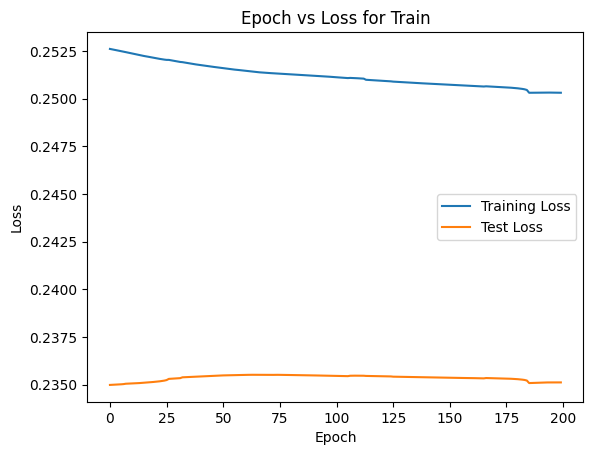

[0.25260554711665334, 0.2525800417800533, 0.2525568499081396, 0.25253386591476296, 0.25251082290558663, 0.25248755121262667, 0.2524627687285868, 0.25243672867751427, 0.25241082517204894, 0.25238556659230654, 0.2523600328475944, 0.2523344227838037, 0.2523091376160605, 0.2522842800461717, 0.2522597306956897, 0.2522354604085022, 0.2522114823894242, 0.2521931592834592, 0.25217003091447676, 0.252147260971277, 0.2521249740552881, 0.25210359934542587, 0.2520828204883267, 0.25206334900809474, 0.2520454455494708, 0.2520311151428333, 0.25203004710035104, 0.2520080037239509, 0.25198512503619347, 0.2519636413537539, 0.2519426542334907, 0.2519224293519479, 0.25191147048285656, 0.2518909174419671, 0.25187000710543417, 0.25184980183650885, 0.25182995465117536, 0.2518102605722019, 0.2517918740729736, 0.2517746266098796, 0.2517575458742022, 0.25174073493657084, 0.25172403402162713, 0.2517076007516883, 0.2516913117342951, 0.251674933532931, 0.25165915268358086, 0.25164353558332314, 0.25162809618478155, 

In [89]:
# Define the QuickProp class
class QuickProp:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize network architecture
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize network weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.delta_input_hidden = np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.delta_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))
        
        # Initialize QuickProp parameters
        self.prev_gradient_w_input_hidden = np.zeros((input_size, hidden_size))
        self.prev_gradient_w_hidden_output = np.zeros((hidden_size, output_size))
        self.prev_gradient_b_hidden = np.zeros((1, hidden_size))
        self.prev_gradient_b_output = np.zeros((1, output_size))
        
        # self.theta_w_input_hidden = np.ones((input_size, hidden_size))
        # self.theta_w_hidden_output = np.ones((hidden_size, output_size))
        self.delta_input_hidden = np.ones((input_size, hidden_size))
        self.delta_hidden_output = np.ones((hidden_size, output_size))
        # self.theta_b_hidden = np.ones((1, hidden_size))
        # self.theta_b_output = np.ones((1, output_size))
        self.delta_b_hidden = np.ones((1, hidden_size))
        self.delta_b_hidden.fill(0.001)
        self.delta_b_output = np.ones((1, output_size))
        self.delta_b_output.fill(0.001)

        
        # self.mu = 1.75  # Increase factor
        # self.alpha = 0.0001  # Decrease factor

    def tanh(self, x):
        return np.tanh(x)

    def tanh_derivative(self, x):
        return 1 - np.tanh(x)**2
    
    def leaky_relu(self, x):
        return np.maximum(0.01*x, x)
    
    def leaky_relu_derivative(self, x):
        dx = np.ones_like(x)
        dx[x < 0] = 0.01
        return dx

    def forward(self, x):
        # Forward pass
        self.input_layer = x
        self.hidden_layer_input = np.dot(self.input_layer, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = self.leaky_relu(self.hidden_layer_input)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.output_layer_output = self.leaky_relu(self.output_layer_input)
        return self.output_layer_output

    def backward(self, x, y):
        min_val=1e-6
        max_val=50
        # Backpropagation
        output_error = y - self.output_layer_output
        delta_output = output_error * self.leaky_relu_derivative(self.output_layer_input)
        
        hidden_error = delta_output.dot(self.weights_hidden_output.T)
        delta_hidden = hidden_error * self.leaky_relu_derivative(self.hidden_layer_input)
        
        # Update QuickProp parameters
        x=x.reshape(1,-1)
        gradient_w_input_hidden = x.T.dot(delta_hidden)
        # print(gradient_w_input_hidden.shape)
        gradient_w_hidden_output = self.hidden_layer_output.T.dot(delta_output)
        # print(gradient_w_hidden_output.shape)
        gradient_b_hidden = np.sum(delta_hidden, axis=0, keepdims=True)
        gradient_b_output = np.sum(delta_output, axis=0, keepdims=True)
        #iterate over each element of the matrix gradient_w_input_hidden
        delta_input_hidden_dc=copy.deepcopy(self.delta_input_hidden)
        for i in range(gradient_w_input_hidden.shape[0]):
            for j in range(gradient_w_input_hidden.shape[1]):
                delta=1
                if(gradient_w_input_hidden[i][j]-self.prev_gradient_w_input_hidden[i][j]!=0):
                    delta=self.delta_input_hidden[i][j]/(gradient_w_input_hidden[i][j]-self.prev_gradient_w_input_hidden[i][j])
                delta*=gradient_w_input_hidden[i][j]
                delta=max(min_val,delta)
                delta=min(max_val,delta)
                delta_input_hidden_dc[i][j]=delta
                # print(delta)
        # print(np.array_equal(delta_input_hidden_dc,self.delta_input_hidden))
        self.delta_input_hidden=delta_input_hidden_dc

        delta_hidden_output_dc=copy.deepcopy(self.delta_hidden_output)
        for i in range(gradient_w_hidden_output.shape[0]):
            for j in range(gradient_w_hidden_output.shape[1]):
                delta=1
                if(gradient_w_hidden_output[i][j]-self.prev_gradient_w_hidden_output[i][j]!=0):
                    delta=self.delta_hidden_output[i][j]/(gradient_w_hidden_output[i][j]-self.prev_gradient_w_hidden_output[i][j])
                delta*=gradient_w_hidden_output[i][j]
                delta=max(min_val,delta)
                delta=min(max_val,delta)
                delta_hidden_output_dc[i][j]=delta
        
        self.delta_hidden_output=delta_hidden_output_dc
        
    
        delta_b_hidden_dc=copy.deepcopy(self.delta_b_hidden)
        for i in range(gradient_b_hidden.shape[0]):
            for j in range(gradient_b_hidden.shape[1]):
                delta=1
                if(gradient_b_hidden[i][j]-self.prev_gradient_b_hidden[i][j]!=0):
                    delta=self.delta_b_hidden[i][j]/(gradient_b_hidden[i][j]-self.prev_gradient_b_hidden[i][j])
                delta*=gradient_b_hidden[i][j]
                delta=max(min_val,delta)
                delta=min(max_val,delta)
                self.delta_b_hidden[i][j]=delta
        self.delta_b_hidden=delta_b_hidden_dc

        delta_b_output_dc=copy.deepcopy(self.delta_b_output)
        for i in range(gradient_b_output.shape[0]):
            for j in range(gradient_b_output.shape[1]):
                delta=1
                if(gradient_b_output[i][j]-self.prev_gradient_b_output[i][j]!=0):
                    delta=self.delta_b_output[i][j]/(gradient_b_output[i][j]-self.prev_gradient_b_output[i][j])
                delta*=gradient_b_output[i][j]
                delta=max(min_val,delta)
                delta=min(max_val,delta)
                self.delta_b_output[i][j]=delta
        self.delta_b_output=delta_b_output_dc

        # Update weights and biases       
        self.weights_input_hidden -= 0.001*self.delta_input_hidden
        self.weights_hidden_output -= 0.001*self.delta_hidden_output
        self.bias_hidden -= 0.001*self.delta_b_hidden
        self.bias_output -= 0.001*self.delta_b_output
        
        self.prev_gradient_w_input_hidden = gradient_w_input_hidden
        self.prev_gradient_w_hidden_output = gradient_w_hidden_output
        self.prev_gradient_b_hidden = gradient_b_hidden
        self.prev_gradient_b_output = gradient_b_output

    def train(self, x_train, y_train, x_test,y_test,epochs):
        loss_history = []  # List to store loss values
        test_loss_history=[]

        for epoch in range(epochs):
            for i in range(len(x_train)):
                x = x_train[i]
                y = y_train[i]
                self.forward(x)
                self.backward(x, y)

            loss = np.mean(np.square(y_train - self.forward(x_train)))
            loss2=np.mean(np.square(y_test-self.forward(x_test)))
            loss_history.append(loss)  # Append the loss to the history
            test_loss_history.append(loss2)

            if (epoch + 1) % 100 == 0:
                loss = np.mean(np.square(y_train - self.forward(x_train)))
                print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss}")

        plt.plot(range(epochs), loss_history, label='Training Loss')
        plt.plot(range(epochs), test_loss_history, label='Test Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Epoch vs Loss for Train')
        plt.legend()
        plt.show()
        print(loss_history)

# Example usage
if __name__ == "__main__":
    # Generate random data for demonstration
    np.random.seed(42)
    # x_train = np.random.rand(100, 8)
    # y_train = np.sin(2 * np.pi * x_train[:, 0:1]) + 0.1 * np.random.randn(100, 1)
    
    # Create and train the neural network
    input_size = 8
    hidden_size = 25
    output_size = 1
    quickprop_net3 = QuickProp(input_size, hidden_size, output_size)
    quickprop_net3.train(X_train, y_train, X_test,y_test,epochs=1000)


test loss is almost the same
train loss decreases with time

Epoch 100/200, Loss: 2.803828449448099
Epoch 200/200, Loss: 2.2735566906666755


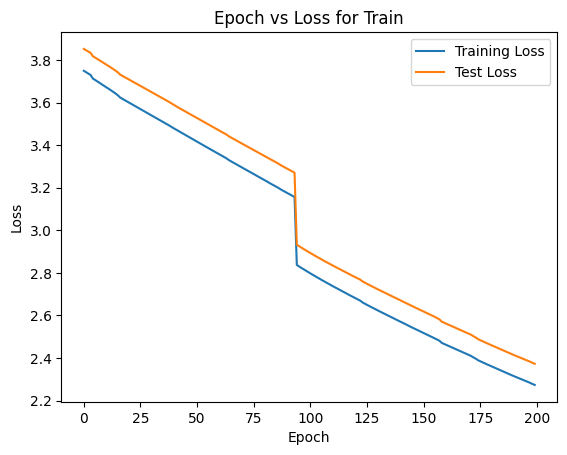

[3.7495416581253918, 3.7429541314511807, 3.736331418730631, 3.7296532378478493, 3.713044394001705, 3.706341253354275, 3.6994166880124095, 3.692061892148518, 3.6853214687673885, 3.6785139474490247, 3.6716610973010484, 3.664684584521258, 3.6576303860075, 3.650385619965204, 3.642782208947774, 3.6346120223166576, 3.624043088720297, 3.6179789746466704, 3.6119370810609204, 3.6059084802163235, 3.5998818043049994, 3.5936569913903007, 3.58763403042416, 3.581594631822199, 3.5755762137856126, 3.5695604031896364, 3.5635218977444736, 3.5575207571932594, 3.5515289993174743, 3.545529488865441, 3.5395088779248014, 3.533437288291636, 3.5273672582527382, 3.521297730962025, 3.515246906795691, 3.5091638522096114, 3.503060503145809, 3.496979272344411, 3.49048657749537, 3.483618014291662, 3.477468415768962, 3.470977777652557, 3.4649039648717266, 3.458855415441034, 3.4527960163289104, 3.44674170675966, 3.4405320634404397, 3.434511940606455, 3.4284683398925377, 3.4224296710977864, 3.4163935245847243, 3.410323

In [90]:
input_size = 8
hidden_size = 50
output_size = 1
quickprop_net3 = QuickProp(input_size, hidden_size, output_size)
quickprop_net3.train(X_train, y_train, X_test,y_test,epochs=1000)

increasing the size of the hidden layer increases the accuracy of the model

for quickprop:
50 layer hidden , leaky relu is better than 25 layer hidden, leaky relu because it converges faster. the loss decreases faster
25 layer hidden , tanh is better than 50 layer hidden, relu because it converges faster